### Q1. What does the primary analysis of several categorical features reveal?

Primary analysis of several categorical features can reveal patterns, trends, and relationships between different variables. For example, the “multiple histograms” example for numeric vs. categorical variables shows variation in the distribution of passengers in the Titanic dataset with regard to economic status (class), sex, age, and survival. It can also be used to compare distributions between different categorical variables. Bivariate analysis is also a useful tool to evaluate the relationship between two variables, which can be numerical and numerical, numerical and categorical, or categorical and categorical. By evaluating these relationships, patterns in the data can be uncovered, leading to deeper understanding of the data and more accurate predictions

### Q2. Perform the following Exploratory Data Analysis tasks:
a. Missing Value Analysis

b. Label Encoding wherever required

c. Selecting important features.

d. Outlier Detection & Handling

e. Standardize the data using the anyone of the scalers provided by sklearn.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('titanic.csv')

In [3]:
data.shape

(891, 12)

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.drop('PassengerId', inplace = True, axis = 1)

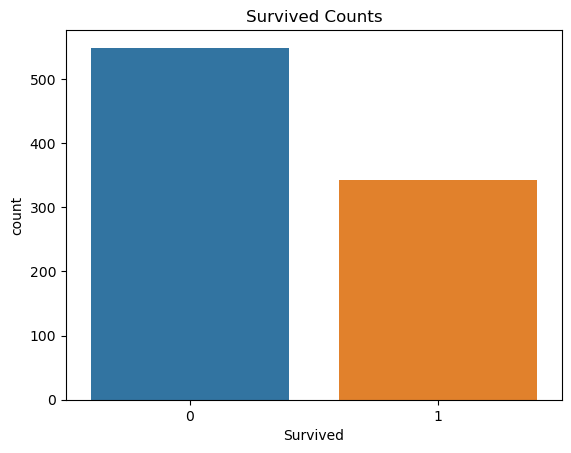

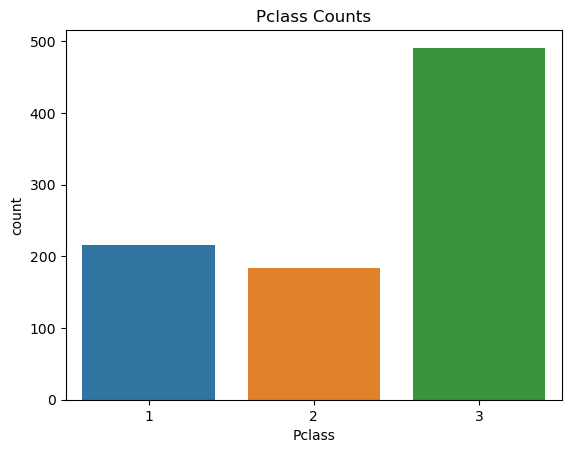

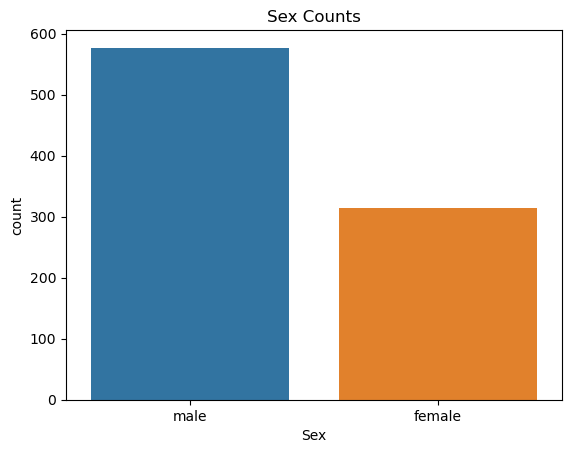

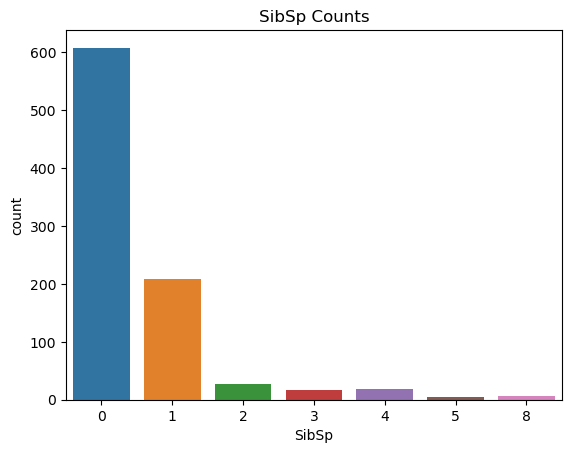

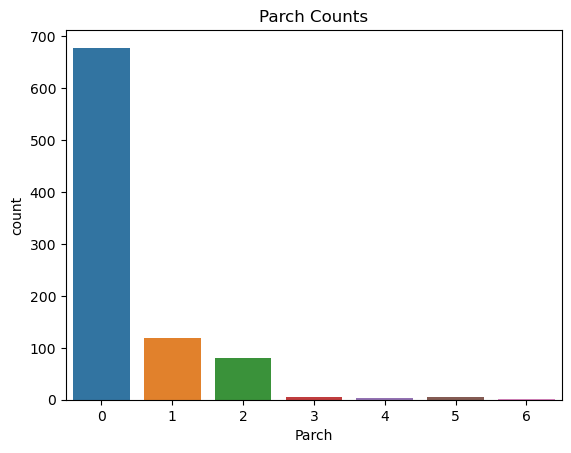

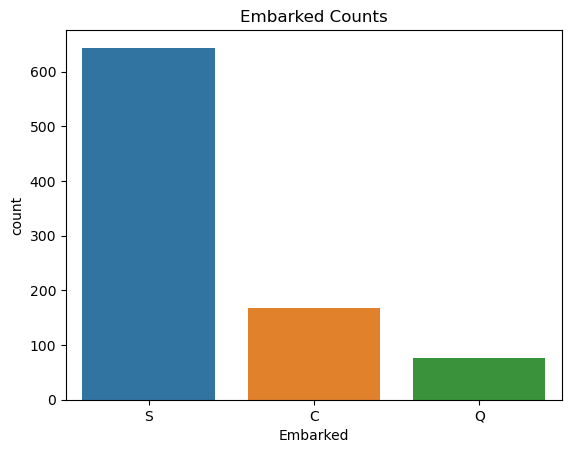

In [8]:
df = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for i in df:
    sns.countplot(data = data, x = i)
    plt.title(i + " Counts")
    plt.show()

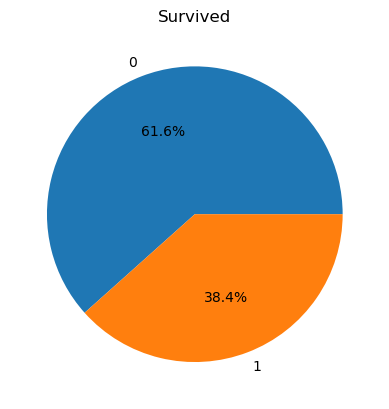

In [9]:
survived = data['Survived'].value_counts()
mylabels = [0,1]
plt.pie(survived, labels = mylabels, autopct = '%1.1f%%')
plt.title('Survived')
plt.show()

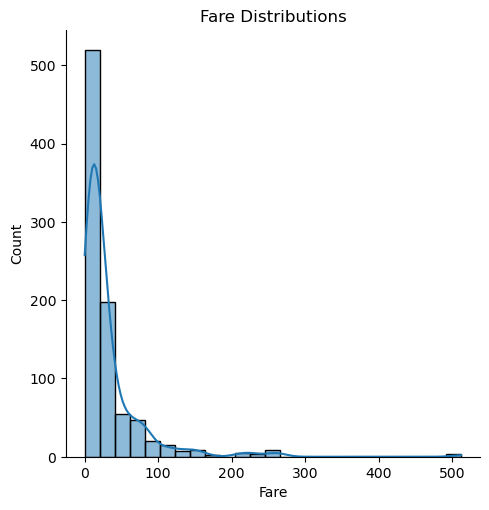

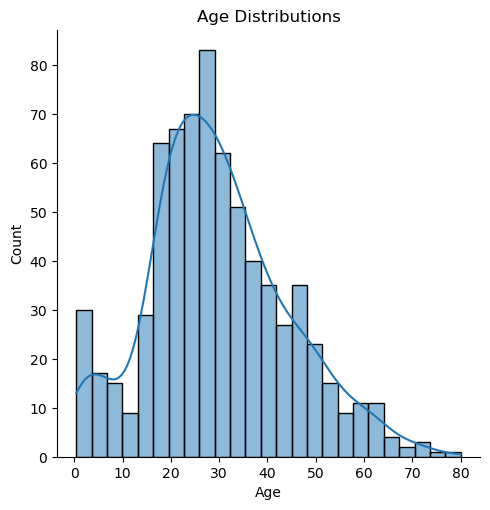

In [10]:
for i in ['Fare', 'Age']:
    sns.displot(data = data, x = i, kde=True, bins=25)
    plt.title(i + ' Distributions')
    plt.show()

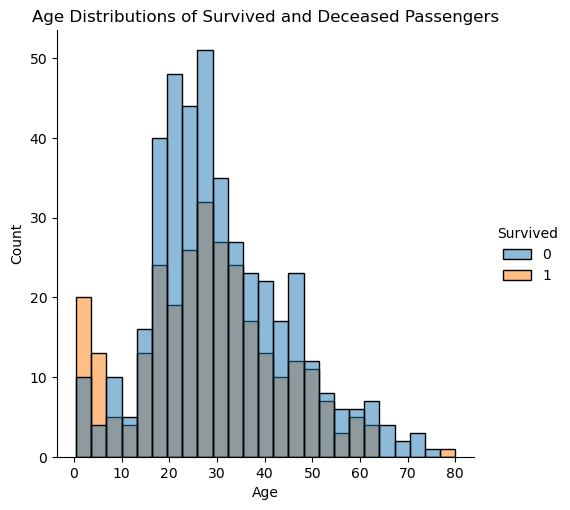

In [11]:
sns.displot(data = data, x = 'Age', hue = 'Survived', bins = 25)
plt.title('Age Distributions of Survived and Deceased Passengers')
plt.show()

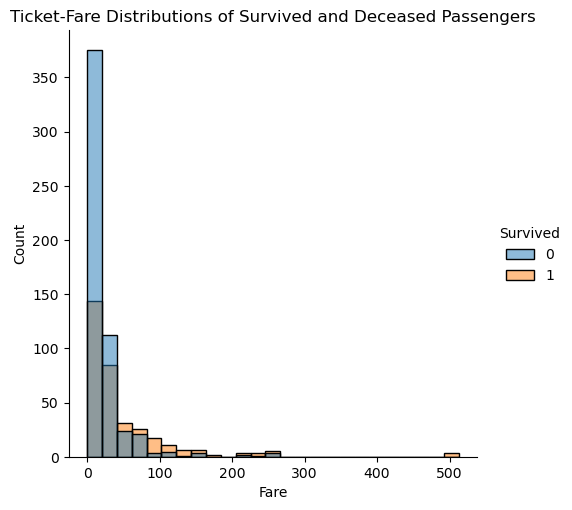

In [12]:
sns.displot(data = data, x = 'Fare', hue = 'Survived', bins = 25)
plt.title('Ticket-Fare Distributions of Survived and Deceased Passengers')
plt.show()

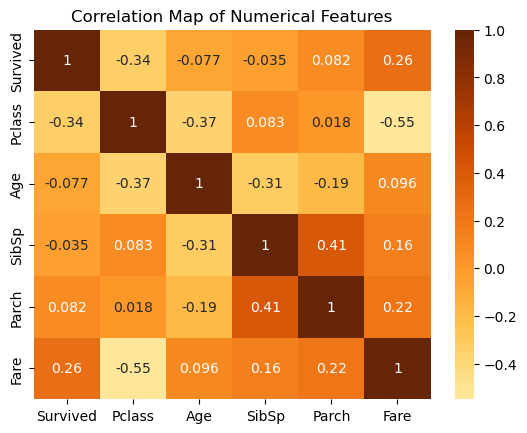

In [13]:
sns.heatmap(data.corr(), annot = True, cmap = 'YlOrBr', center = 0)
plt.title('Correlation Map of Numerical Features')
plt.show()

#### a. Missing Value Analysis

In [14]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [15]:
data.drop(columns = ['Name','Cabin','Ticket'], inplace = True)

In [16]:
data['Age'].fillna(data['Age'].mean(), inplace = True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

In [17]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### b. Label Encoding wherever required

In [18]:
from sklearn.preprocessing import LabelEncoder

cols = ['Sex','Embarked']
le = LabelEncoder()
for x in cols:
    data[x] = le.fit_transform(data[x])

In [19]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


#### d. Outlier Detection & Handling

<AxesSubplot:>

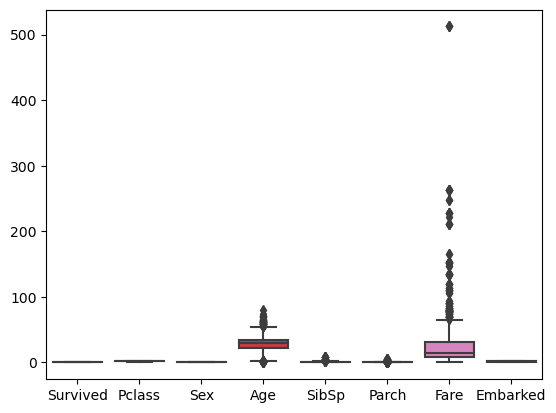

In [20]:
sns.boxplot(data = data)

In [21]:
Q3 = data['Age'].quantile(0.75)
Q1 = data['Age'].quantile(0.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

data = data[(data['Age'] > lower) & (data['Age'] < upper)]

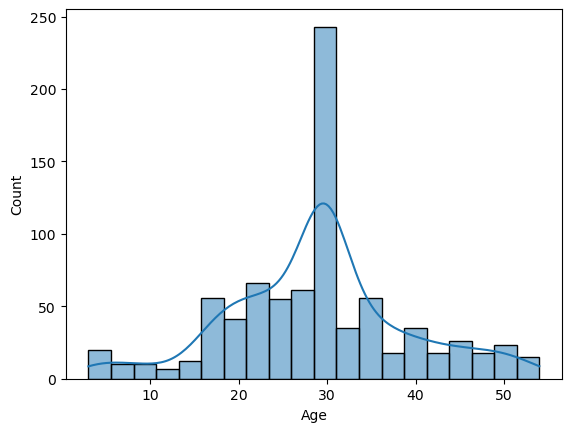

In [22]:
sns.histplot(data = data, x = 'Age', kde = True)
plt.show()

In [23]:
Q3 = data['Fare'].quantile(0.75)
Q1 = data['Fare'].quantile(0.25)

IQR = Q3 - Q1

upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

data = data[(data['Fare'] > lower) & (data['Fare'] < upper)]

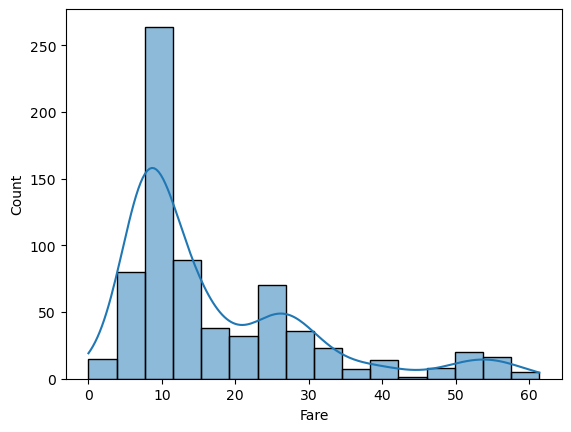

In [24]:
sns.histplot(data = data, x = 'Fare', kde = True)
plt.show()

#### c. Selecting important features.

In [25]:
from sklearn.feature_selection import chi2

In [26]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [27]:
df1 = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [28]:
x1 = df1.drop('Survived', axis = 'columns')

y1 = df1['Survived']

In [29]:
f_score = chi2(x1, y1)

In [30]:
f_score 

(array([1.05271689e+01, 5.94835110e+01, 1.15717938e+01, 7.93617251e-03,
        6.95744712e+00, 4.48177570e+02, 2.57350748e+00]),
 array([1.17632277e-03, 1.23323106e-14, 6.69597917e-04, 9.29014201e-01,
        8.34710498e-03, 1.79774680e-99, 1.08666552e-01]))

In [31]:
p_value = pd.Series(f_score[1], index = x1.columns)
p_value = p_value.sort_values(ascending = True)
p_value

Fare        1.797747e-99
Sex         1.233231e-14
Age         6.695979e-04
Pclass      1.176323e-03
Parch       8.347105e-03
Embarked    1.086666e-01
SibSp       9.290142e-01
dtype: float64

In [32]:
cols = []

for i in p_value.index:
    if p_value[i] <= 0.05:
        print(i, ' :- Reject Null Hypothesis')
    else:
        print(i, ' :- Accept Null Hypothesis')
        cols.append(i)

Fare  :- Reject Null Hypothesis
Sex  :- Reject Null Hypothesis
Age  :- Reject Null Hypothesis
Pclass  :- Reject Null Hypothesis
Parch  :- Reject Null Hypothesis
Embarked  :- Accept Null Hypothesis
SibSp  :- Accept Null Hypothesis


In [33]:
data.drop(labels = cols, axis = 1, inplace = True)

In [34]:
data.head()

,Survived,Pclass,Sex,Age,Parch,Fare
0,0,3,1,22.000000,0,7.2500
2,1,3,0,26.000000,0,7.9250
3,1,1,0,35.000000,0,53.1000
4,0,3,1,35.000000,0,8.0500
5,0,3,1,29.699118,0,8.4583


#### e. Standardize the data using the anyone of the scalers provided by sklearn.

In [35]:
from sklearn.preprocessing import StandardScaler

std_scal = StandardScaler()
cols = ['Age','Fare']

for col in cols:
    data[col] = std_scal.fit_transform(data[col].values.reshape(-1,1))

In [36]:
data.head()

,Survived,Pclass,Sex,Age,Parch,Fare
0,0,3,1,-0.644501,0,-0.751265
2,1,3,0,-0.245599,0,-0.700265
3,1,1,0,0.651930,0,2.712961
4,0,3,1,0.651930,0,-0.690821
5,0,3,1,0.123297,0,-0.659971


In [37]:
from sklearn.model_selection import train_test_split

X = data.drop('Survived', axis = 1)
Y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 42)

### Q3. Build the following Supervised Learning models:

a. Logistic Regression

b.Naïve Bayes

c. KNN

d. SVM

#### a. Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [39]:
y_pred_lr = model.predict(X_test)

#### b. Naïve Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB()

In [41]:
y_pred_nb = gnb.predict(X_test)

#### c. KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 15)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [43]:
y_pred_knn = knn.predict(X_test)

#### d. SVM

In [44]:
from sklearn import svm

classifier = svm.SVC(kernel = 'rbf')

classifier.fit(X_train, y_train)

SVC()

In [45]:
y_pred_svm = classifier.predict(X_test)

### Q4. Tabulate the performance metrics of all the above models and tell which model performs better in predicting if the Passenger will survive or not

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [47]:
print("Confusion Matrix on test data using Logistic Regression : \n", confusion_matrix(y_test, y_pred_lr))
print(" \nAccuracy Score on test data using Logistic Regression :", accuracy_score(y_test, y_pred_lr))

Confusion Matrix on test data using Logistic Regression : 
 [[81 14]
 [18 31]]
 
Accuracy Score on test data using Logistic Regression : 0.7777777777777778


In [48]:
print("Confusion Matrix on test data using Naive Bayes : \n", confusion_matrix(y_test, y_pred_nb))
print("\nAccuracy Score on test data using Naive Bayes :", accuracy_score(y_test, y_pred_nb))

Confusion Matrix on test data using Naive Bayes : 
 [[72 23]
 [10 39]]

Accuracy Score on test data using Naive Bayes : 0.7708333333333334


In [49]:
print("Confusion Matrix on test data using Knn : \n", confusion_matrix(y_test, y_pred_knn))
print("\nK Nearest neighbors on test data using Knn : ", accuracy_score(y_test, y_pred_knn))

Confusion Matrix on test data using Knn : 
 [[84 11]
 [17 32]]

K Nearest neighbors on test data using Knn :  0.8055555555555556


In [50]:
print("Confusion Matrix on test data using Svm : \n", confusion_matrix(y_test, y_pred_svm))
print("Accuracy Score on test data using SVM :", accuracy_score(y_test, y_pred_svm))

Confusion Matrix on test data using Svm : 
 [[84 11]
 [15 34]]
Accuracy Score on test data using SVM : 0.8194444444444444


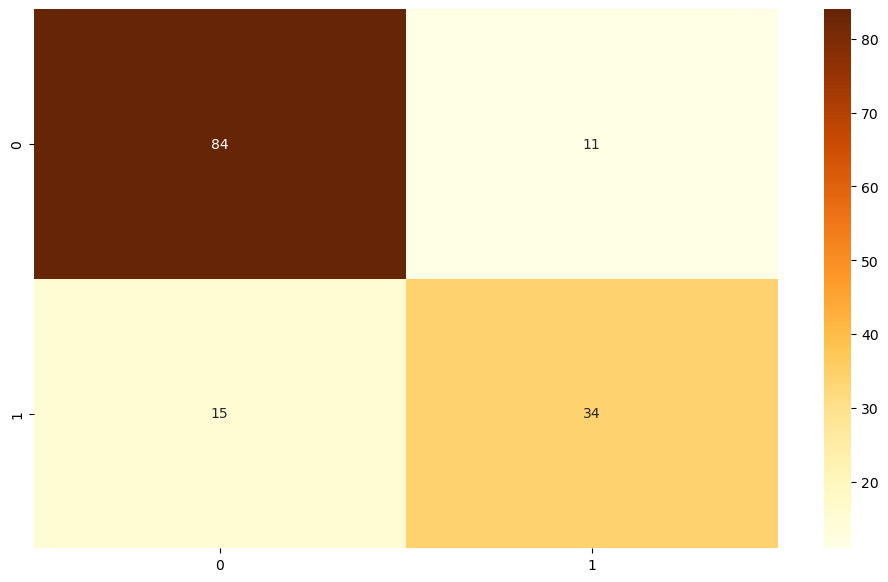

In [51]:
plt.figure(figsize = (12, 7))

cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot = True, cmap = 'YlOrBr')
plt.show()

In [52]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'KNN', 'Support Vector Machines'],
    
    'acc_Score': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_nb), 
                  accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_svm)]})

result_df = results.sort_values(by = 'acc_Score', ascending = False)

result_df = result_df.set_index('acc_Score')

result_df.head()

,Model
acc_Score,
0.819444,Support Vector Machines
0.805556,KNN
0.777778,Logistic Regression
0.770833,Naive Bayes
